In [2]:
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split

  import torch
  from torch.utils.data import Dataset, DataLoader
  import torch.nn as nn
  import torch.optim as optim

In [3]:
# Setting random seeds for reproducing
torch.manual_seed(42)

In [4]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


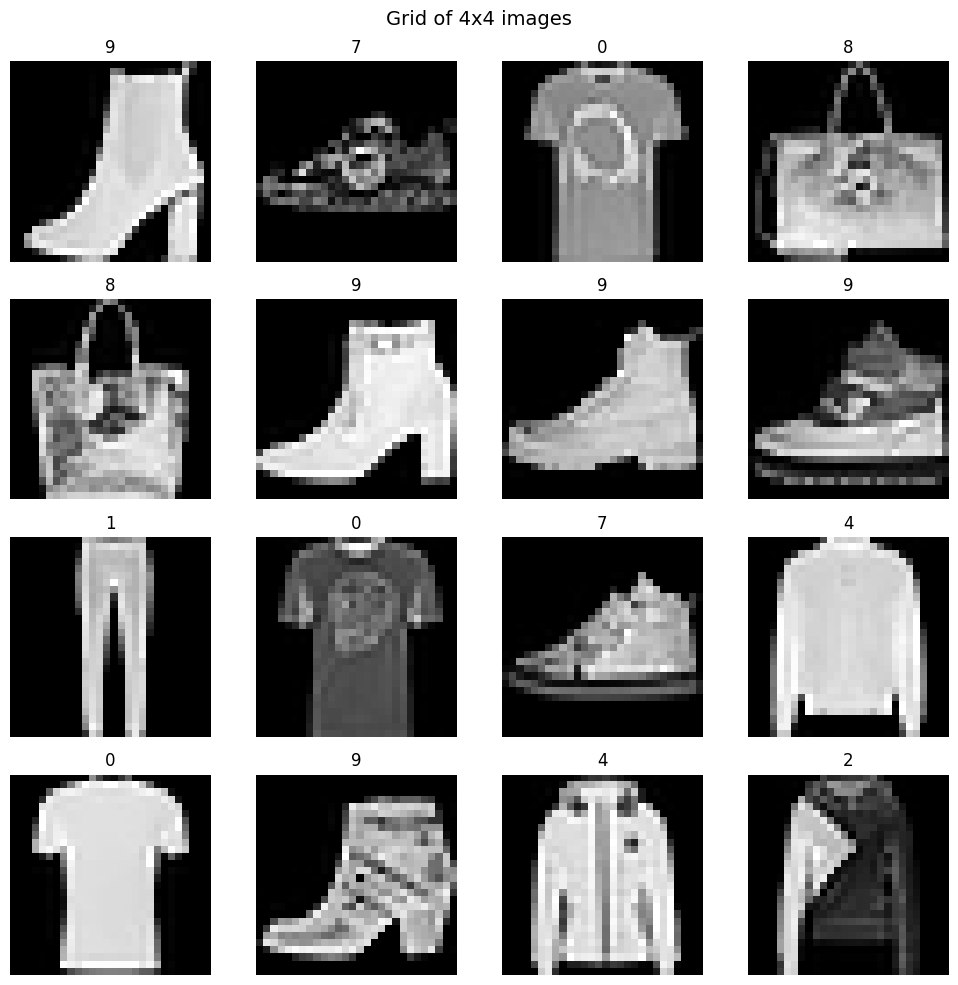

In [5]:
# Creating a grid of 4x4 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Grid of 4x4 images', fontsize=14)

# Plotting first 16 images
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28) # Reshape to 28x28
  ax.imshow(img, cmap='gray') # Display in grayscale
  ax.axis('off') # Remove axis
  ax.set_title(df.iloc[i, 0]) # Show label

plt.tight_layout()
plt.show()

In [6]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

## Creating dataloader objects

In [11]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [15]:
# create train and test dataset
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(len(test_dataset))

4800
1200


In [23]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Defining model architecture

In [24]:
# define NN class
class FashionNet(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # Applies softmax auto, PyTorch W
    )

  def forward(self, x):
    return self.model(x)

In [25]:
# set learning rate and epochs
learning_rate = 0.01
epochs = 100

In [26]:
# instantiate model
model = FashionNet(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

## Training loop

In [27]:
for epoch in range(epochs):

  total_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    output = model(batch_features)

    # calculate loss
    loss = criterion(output, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update gradients
    optimizer.step()

    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/100, Loss: 2.2705
Epoch 2/100, Loss: 2.1972
Epoch 3/100, Loss: 2.0822
Epoch 4/100, Loss: 1.8882
Epoch 5/100, Loss: 1.6268
Epoch 6/100, Loss: 1.3996
Epoch 7/100, Loss: 1.2444
Epoch 8/100, Loss: 1.1380
Epoch 9/100, Loss: 1.0604
Epoch 10/100, Loss: 1.0010
Epoch 11/100, Loss: 0.9545
Epoch 12/100, Loss: 0.9157
Epoch 13/100, Loss: 0.8854
Epoch 14/100, Loss: 0.8615
Epoch 15/100, Loss: 0.8367
Epoch 16/100, Loss: 0.8154
Epoch 17/100, Loss: 0.7978
Epoch 18/100, Loss: 0.7821
Epoch 19/100, Loss: 0.7670
Epoch 20/100, Loss: 0.7534
Epoch 21/100, Loss: 0.7391
Epoch 22/100, Loss: 0.7248
Epoch 23/100, Loss: 0.7124
Epoch 24/100, Loss: 0.7006
Epoch 25/100, Loss: 0.6899
Epoch 26/100, Loss: 0.6784
Epoch 27/100, Loss: 0.6702
Epoch 28/100, Loss: 0.6564
Epoch 29/100, Loss: 0.6503
Epoch 30/100, Loss: 0.6409
Epoch 31/100, Loss: 0.6276
Epoch 32/100, Loss: 0.6227
Epoch 33/100, Loss: 0.6163
Epoch 34/100, Loss: 0.6094
Epoch 35/100, Loss: 0.6010
Epoch 36/100, Loss: 0.5935
Epoch 37/100, Loss: 0.5876
Epoch 38/1

## Evaluation

In [28]:
# set model to eval mode
model.eval()

FashionNet(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [29]:
# manual evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    output = model(batch_features)
    _, predicted = torch.max(output, 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

  print(f'Accuracy: {100*correct/total:.2f}%')

Accuracy: 83.00%
